In [16]:
from salad import layer
from salad.layer import AssociationMatrix

import torch
import torch.nn.functional as F

def Association(xs,xt):   
    Bs = xs.size()[0]
    Bt = xt.size()[0]

    xs = xs.clone().view(Bs, -1)
    xt = xt.clone().view(Bt, -1)

    W = torch.mm(xs, xt.transpose(1,0))

    # p(xt | xs) as softmax, normalize over xt axis
    Pst = F.softmax(W, dim=1) # Ns x Nt
    # p(xs | xt) as softmax, normalize over xs axis
    Pts = F.softmax(W.transpose(1,0), dim=1) # Nt x Ns

    # p(xs | xs)
    Psts = Pst.mm(Pts) # Ns x Ns

    # p(xt)
    Pt = torch.mean(Pst, dim=0, keepdim=True) # Nt
    
    return Pst, Pts, Psts, Pt

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
x = torch.rand(10,5)
p = torch.nn.Parameter(x).detach()

p.set_(torch.nn.Parameter(x*.0001))

tensor(1.00000e-05 *
       [[ 3.4099,  1.5310,  3.2248,  0.1439,  4.1277],
        [ 9.1670,  9.2356,  1.8516,  9.3348,  5.9303],
        [ 8.3784,  7.8997,  6.3170,  6.5713,  5.4260],
        [ 0.3169,  1.8238,  1.7772,  0.1148,  9.5051],
        [ 1.2791,  9.6400,  6.3059,  2.3435,  6.4280],
        [ 8.0758,  2.2007,  0.1667,  0.5070,  4.3399],
        [ 1.3377,  4.2586,  4.4073,  9.9805,  1.2562],
        [ 5.9302,  7.7223,  3.1946,  4.1958,  5.7087],
        [ 5.2582,  6.4900,  3.6123,  1.9659,  1.9287],
        [ 3.8871,  9.1174,  9.5976,  6.8534,  8.1567]])

In [70]:
from sklearn.datasets import load_digits
import numpy as np

data = load_digits()

def get_batch(data):
    
    y   = data['target']
    X   = data['data'][y < 3]
    y   = y[y < 3]
    
    idc = np.arange(len(X))
    np.random.shuffle(idc)
    
    idc = np.argsort(y)
    X = X[idc][::10]
    y = y[idc][::10]

    return X, y

X, y   = get_batch(data)
X_, y_ = get_batch(data)

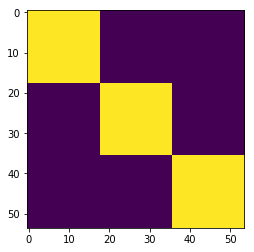

In [71]:
plt.imshow(np.equal(y[:,np.newaxis], y[np.newaxis,:]))

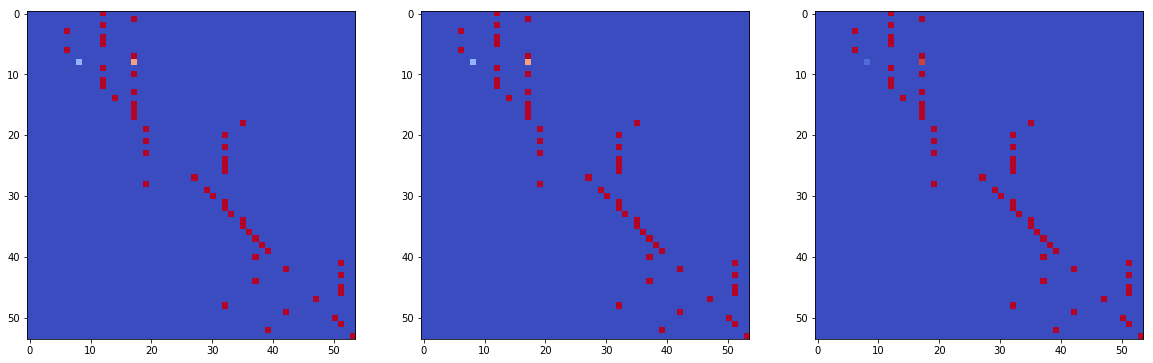

In [78]:
xs = torch.from_numpy(X)
xt = torch.from_numpy(X_)

mats = Association(xs, xt)[:3]

fig, axes = plt.subplots(1,3,figsize=(20,8))

for ax, M in zip(axes, mats):
    
    ax.imshow(M, cmap='coolwarm')
    #ax.axis('off')
    #ax.imshow(np.equal(y[:,np.newaxis], y[np.newaxis,:]), alpha=.5, cmap='gray')